In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import seaborn as sns 
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings 

warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:/Users/uist1/OneDrive/Desktop/Portfolio Work/Python Projects/Mental Health and Digital Behaviours/mental_health_digital_behavior_data.csv')

In [2]:
#Check Datatypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [3]:
#Check for missing values
df.isnull().sum()

daily_screen_time_min      0
num_app_switches           0
sleep_hours                0
notification_count         0
social_media_time_min      0
focus_score                0
mood_score                 0
anxiety_level              0
digital_wellbeing_score    0
dtype: int64

In [4]:
#Examine the descriptives of the Dataset
df.describe()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,360.437800,49.840000,6.557400,79.51200,121.771800,6.998000,8.988600,8.451800,52.310400
std,58.782476,7.340993,1.192043,23.97974,43.809443,0.618742,0.519104,2.134425,7.943186
min,180.000000,30.000000,3.000000,20.00000,30.000000,5.500000,7.400000,1.000000,34.600000
25%,317.975000,44.000000,5.800000,63.00000,91.875000,6.600000,8.600000,7.275000,46.800000
50%,360.800000,50.000000,6.500000,80.00000,119.550000,7.000000,9.000000,9.700000,51.000000
75%,398.175000,55.000000,7.325000,96.00000,149.500000,7.400000,9.300000,10.000000,56.600000
max,591.200000,72.000000,10.000000,158.00000,296.700000,8.600000,10.000000,10.000000,80.800000


<Axes: >

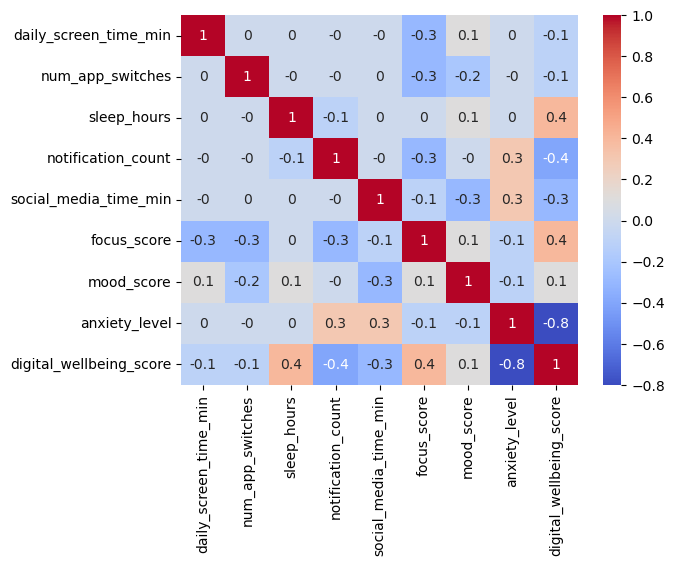

In [5]:
#Examine relationship between variables
Correlation = df.corr().round(1)
#Display in heatmap
sns.heatmap(Correlation, annot=True, cmap='coolwarm')

## Is the relationship between digital well being score and variables with >0.3 or <-0.3 statistically significant

In [7]:
df_slice = df.iloc[ : , [2, 3, 4, 5, 7, 8]]

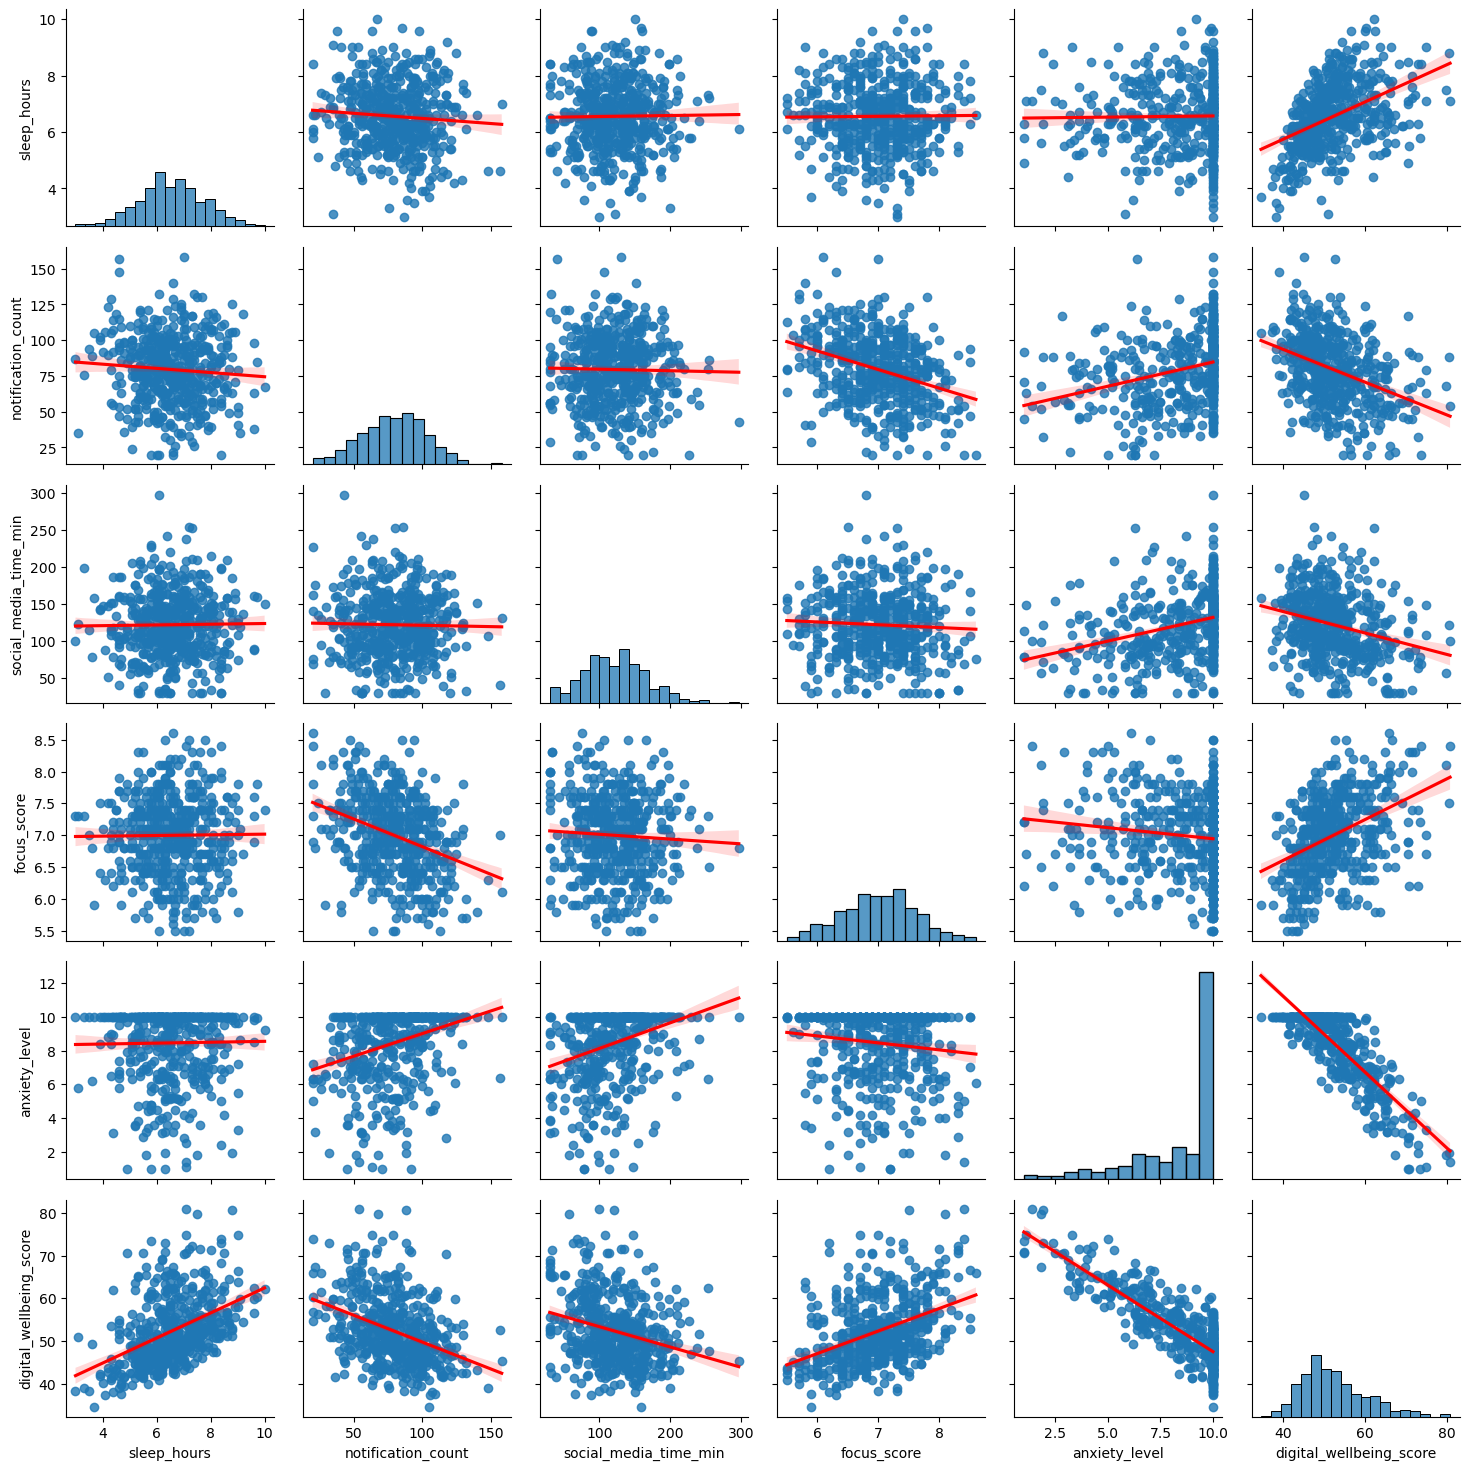

In [8]:
#Visulize relationship between variables using scatter graph and distribution using histograms
g = sns.PairGrid(df_slice)
g.map_upper(sns.regplot, line_kws={'color': 'red'})      
g.map_lower(sns.regplot, line_kws={'color': 'red'})      
g.map_diag(sns.histplot)          

plt.show()

#Line of best fit demonstrates degree of linearity across all five variables and DV (Digital Wellbeing Score). Anxiety visually demonstrates the 
#strongest level of linearity

In [9]:
#Digital wellbeing score does not appear to be normally distributed. To establish if relationship between DV (Digital Well Being Score) and IV
#(all other variables) is significant Spearmans Rank is required 

Variable_Pairs = [
    ('digital_wellbeing_score', 'sleep_hours'),
    ('digital_wellbeing_score', 'notification_count'),
    ('digital_wellbeing_score' ,'social_media_time_min'),
    ('digital_wellbeing_score', 'focus_score'),
    ('digital_wellbeing_score', 'anxiety_level') 
]
results = {}
for var1, var2 in Variable_Pairs:
    correlation, p_value = spearmanr(df[var1], df[var2])
    results[f'{var1} vs {var2}'] = {'Spearman Correlation': correlation, 'p_value': p_value}

for pair, results in results.items():
    print(f"{pair}: Spearman Correlation = {results['Spearman Correlation']:.3f}, p_value = {results['p_value']:.3f}")

#All Variables reach alpha of <0.05. Relationship between variables and DV is statistically significant

digital_wellbeing_score vs sleep_hours: Spearman Correlation = 0.471, p_value = 0.000
digital_wellbeing_score vs notification_count: Spearman Correlation = -0.391, p_value = 0.000
digital_wellbeing_score vs social_media_time_min: Spearman Correlation = -0.263, p_value = 0.000
digital_wellbeing_score vs focus_score: Spearman Correlation = 0.407, p_value = 0.000
digital_wellbeing_score vs anxiety_level: Spearman Correlation = -0.760, p_value = 0.000


## Linear Regression Model

In [11]:
#Fit model with identified variables
x = df_slice[['anxiety_level', 'social_media_time_min', 'notification_count', 'sleep_hours', 'focus_score']]
y = df_slice[['digital_wellbeing_score']]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Training split of 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
#Examine mean squared error, mean absolute error and r2 score to examine model performance. High are r2 score with low MSE and MAE.

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred).round(2)
mae = mean_absolute_error(y_test, y_pred).round(2)
r2 = r2_score(y_test, y_pred)

print(f'MSE = {mse}')
print(f'MAE = {mae}')
print(f'r2 score = {r2}')

MSE = 0.03
MAE = 0.14
r2 score = 0.9994607797535475


In [14]:
#Training and testing score highly with variance between scores minimal (<0.000), indicating low under/overfitting and model performs well on unseen data
training_score = model.score(x_train, y_train)
testing_score = model.score(x_test, y_test)

df_outputs = [{'Training Score': training_score, 'Testing Score': testing_score, 'Variance':  training_score - testing_score}]

df_outputs = pd.DataFrame(df_outputs)
df_outputs

,Training Score,Testing Score,Variance
0,0.999623,0.999461,0.000162


In [15]:
#Feature importance to observe the effect each variable has on the digital wellbeing score
def show_feature_importance(model, feature_names):
    for name, coef in zip(feature_names, model.coef_[0]):
        print(f"{name}: {coef:.4f}")

show_feature_importance(model, x.columns)

anxiety_level: -2.9983
social_media_time_min: -0.0003
notification_count: 0.0002
sleep_hours: 2.9960
focus_score: 3.9852


In [16]:
#Re-fit of model excluding variables which appear to have minimal impact on model
x = df_slice[['anxiety_level', 'sleep_hours', 'focus_score']]
y = df_slice[['digital_wellbeing_score']]

#Training split of 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
#model performance is virtually identical with variables removed
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred).round(2)
mae = mean_absolute_error(y_test, y_pred).round(2)
r2 = r2_score(y_test, y_pred)

print(f'MSE = {mse}')
print(f'MAE = {mae}')
print(f'r2 score = {r2}')

MSE = 0.03
MAE = 0.14
r2 score = 0.9994721320755598


In [18]:
#Training and testing score remains high with marginally less variance
training_score = model.score(x_train, y_train)
testing_score = model.score(x_test, y_test)

df_outputs = [{'Training Score': training_score, 'Testing Score': testing_score, 'Variance':  training_score - testing_score}]

df_outputs = pd.DataFrame(df_outputs)
df_outputs

,Training Score,Testing Score,Variance
0,0.99962,0.999472,0.000148


,feature,coefficient
0,anxiety_level,-2.999077
1,sleep_hours,2.995291
2,focus_score,3.982646


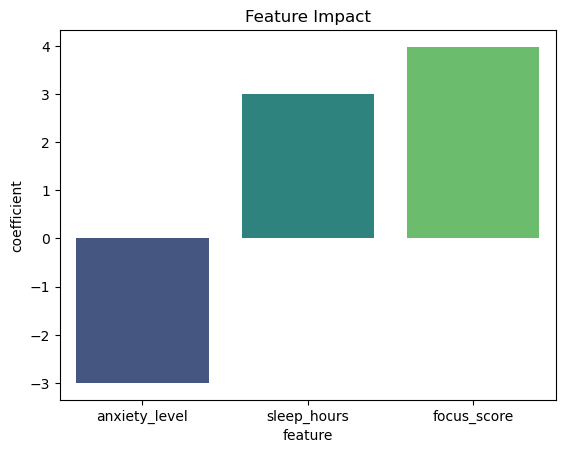

In [19]:
#Feature impact visually demonstrated
coefs = model.coef_[0] 
features = x.columns

importance_df = pd.DataFrame({
    'feature': features,
    'coefficient': coefs
})

sns.barplot(data=importance_df, x='feature', y='coefficient', palette='viridis').set_title('Feature Impact')
importance_df

## Using model to predict Digital Wellbeing score in a number of different conditions

In [21]:
#Desriptives used to obtain values for model scenarios
df_slice.describe()

,sleep_hours,notification_count,social_media_time_min,focus_score,anxiety_level,digital_wellbeing_score
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,6.557400,79.51200,121.771800,6.998000,8.451800,52.310400
std,1.192043,23.97974,43.809443,0.618742,2.134425,7.943186
min,3.000000,20.00000,30.000000,5.500000,1.000000,34.600000
25%,5.800000,63.00000,91.875000,6.600000,7.275000,46.800000
50%,6.500000,80.00000,119.550000,7.000000,9.700000,51.000000
75%,7.325000,96.00000,149.500000,7.400000,10.000000,56.600000
max,10.000000,158.00000,296.700000,8.600000,10.000000,80.800000


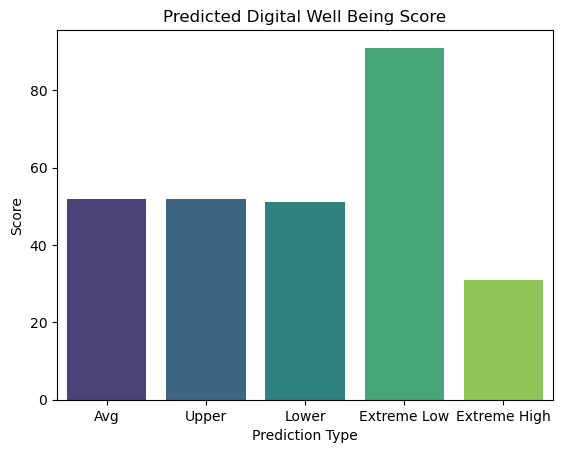

,Prediction Type,Score
0,Avg,52
1,Upper,52
2,Lower,51
3,Extreme Low,91
4,Extreme High,31


In [22]:
#Prediction using mean values for IV's
df_prediction_avg = pd.DataFrame([{'anxiety_level': 8.4518,
                  'sleep_hours' : 6.5574,
                  'focus_score': 6.9980}
                ])
Average_Scores = model.predict(df_prediction_avg) 

#Prediction using upper 75% for IV's
df_prediction_75 = pd.DataFrame([{'anxiety_level': 9.7,
                  'sleep_hours' : 7.3,
                  'focus_score': 7.4}
                ])

upper_percentile_pred = model.predict(df_prediction_75) 

#Prediction using lower 25% for IV's
df_prediction_25 = pd.DataFrame([{'anxiety_level': 7.3,
                  'sleep_hours' : 5.8,
                  'focus_score': 6.6}
                ])

lower_percentile_pred = model.predict(df_prediction_25)

#Prediction using min values for IV's(Max applied to sleep and focus)
df_extreme_low = df_prediction_25 = pd.DataFrame([{'anxiety_level': 1,
                  'sleep_hours' : 10,
                  'focus_score': 8.6}
                ])

extreme_low_pred = model.predict(df_extreme_low)

#Prediction using max values for IV's(Min applied to sleep and focus)
df_extreme_high = df_prediction_25 = pd.DataFrame([{'anxiety_level': 10,
                  'sleep_hours' : 3,
                  'focus_score': 5.5}
                ])

extreme_high_pred = model.predict(df_extreme_high)

scores = ({'Prediction Type': ['Avg', 'Upper', 'Lower', 'Extreme Low', 'Extreme High'], 
           'Score': [Average_Scores, upper_percentile_pred, lower_percentile_pred, extreme_low_pred, extreme_high_pred]})

scores = pd.DataFrame(data=scores)
scores['Score'] = scores['Score'].astype(int)

sns.barplot(data=scores, x='Prediction Type', y='Score', palette='viridis').set_title('Predicted Digital Well Being Score')
plt.show()
scores                   